In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


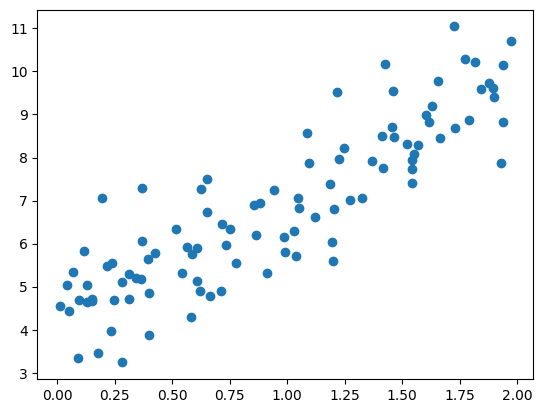

In [7]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
plt.scatter(X, y)


In [9]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

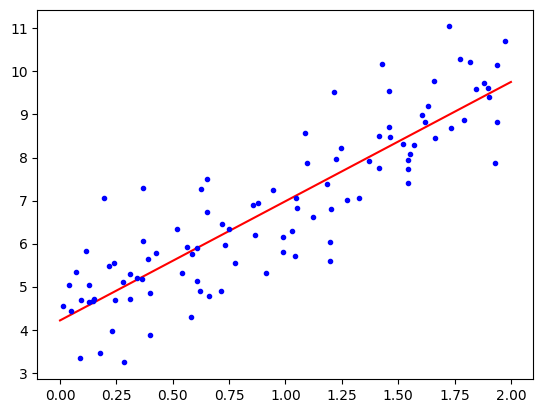

In [11]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [13]:
#Gradient Descent
eta = 0.1
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    gradients = 2/m*X_b.T@(X_b@theta-y)
    theta = theta-eta*gradients
theta

array([[4.21509616],
       [2.77011339]])

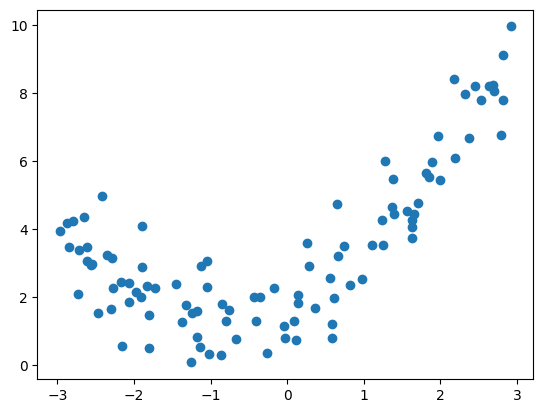

In [14]:
#polynomial
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

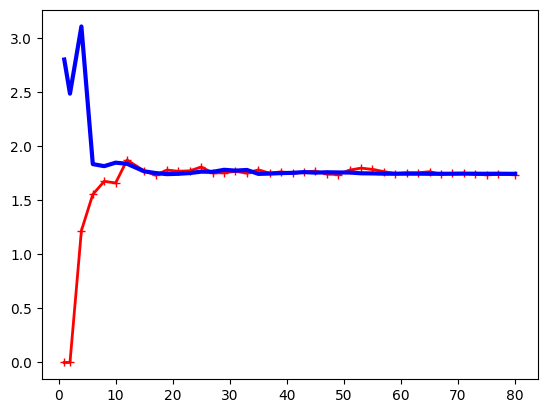

In [16]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
 LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
 scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
[...] # beautify the figure: add labels, axis, grid, and legend
plt.show()


In [18]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

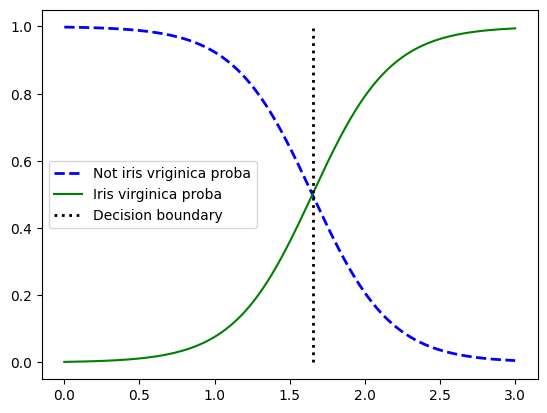

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
plt.plot(X_new, y_proba[:,0],"b--",linewidth=2,label = "Not iris vriginica proba")
plt.plot(X_new, y_proba[:, 1], "g-",  label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")
plt.legend()
plt.show()
